In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
file_path = "train_data.txt"
test_path = "test_data.txt"

In [13]:
train_data = pd.read_csv(file_path, delimiter=':::', header=None)
train_data.columns = ['Movie_id', 'Name', 'Genre', 'Description']

<ipython-input-13-0dc8a1ea8af0>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv(file_path, delimiter=':::', header=None)


In [10]:
train_data

,Movie_id,Name,Genres,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [14]:
train_data.isnull().sum()
class_distribution = train_data['Genre'].value_counts()

In [15]:
print("Class Distribution:", class_distribution)

Class Distribution: Genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64


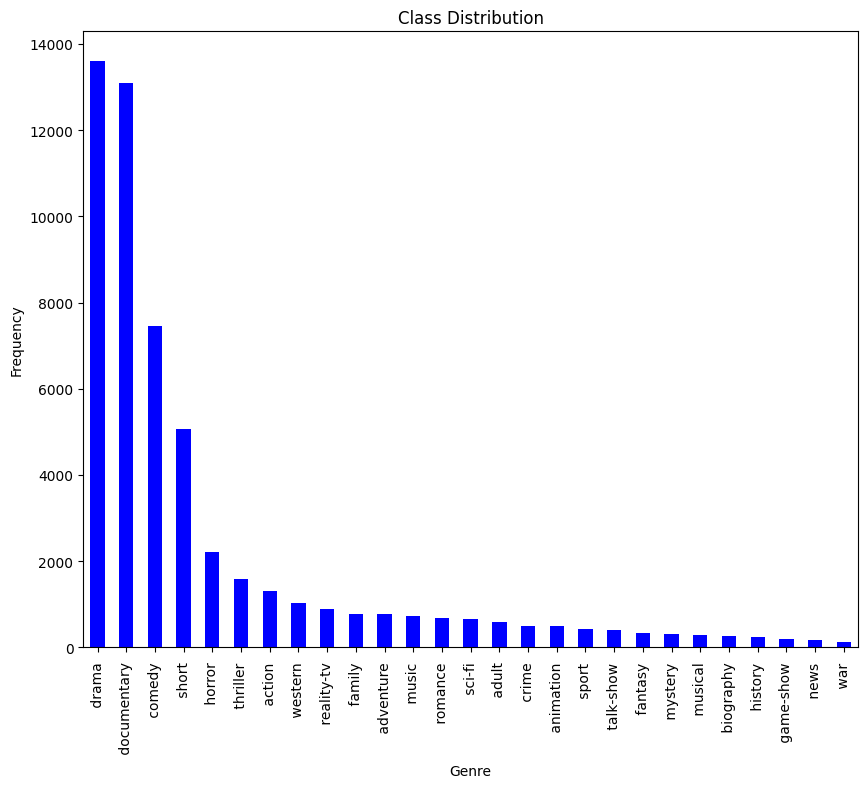

In [17]:
plt.figure(figsize=(10, 8))
class_distribution.plot(kind='bar', color='blue')
plt.title('Class Distribution')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tidf_vectorizer = TfidfVectorizer(max_features = 5000)
X_train = tidf_vectorizer.fit_transform(train_data['Description'])
y_train = train_data['Genre']

In [37]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [25]:
y_train_pred = nb_classifier.predict(X_train)

In [28]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy on training set:", accuracy_score(y_train, y_train_pred))
print("Classification report on training set:\n", classification_report(y_train, y_train_pred, zero_division=1))

Accuracy on training set: 0.5359132327443096
Classification report on training set:
                precision    recall  f1-score   support

      action        0.70      0.09      0.16      1315
       adult        0.79      0.05      0.10       590
   adventure        0.76      0.05      0.10       775
   animation        1.00      0.00      0.00       498
   biography        1.00      0.00      0.00       265
      comedy        0.56      0.45      0.50      7447
       crime        1.00      0.00      0.00       505
 documentary        0.57      0.90      0.70     13096
       drama        0.47      0.84      0.60     13613
      family        1.00      0.00      0.01       784
     fantasy        1.00      0.00      0.00       323
   game-show        1.00      0.14      0.24       194
     history        1.00      0.00      0.00       243
      horror        0.78      0.36      0.50      2204
       music        0.90      0.16      0.27       731
     musical        1.00      0.00

In [31]:
test_data = pd.read_csv(test_path, delimiter=':::', header = None)
test_data.columns = ['Movie_ID', 'Name', 'Description']

<ipython-input-31-fcd20791365c>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv(test_path, delimiter=':::', header = None)


In [32]:
test_data

,Movie_ID,Name,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [39]:
tidf_vectorizer = TfidfVectorizer(max_features = 5000)
X_test = tidf_vectorizer.fit_transform(test_data['Description'])

In [40]:
X_test_pred = nb_classifier.predict(X_test)

In [41]:
test_data['Predicted_Genre'] = X_test_pred

In [44]:
test_data.to_csv('predicted_genres.csv', index = False)

In [45]:
print(test_data)

       Movie_ID                              Name  \
0             1             Edgar's Lunch (1998)    
1             2         La guerra de papá (1977)    
2             3      Off the Beaten Track (2010)    
3             4           Meu Amigo Hindu (2015)    
4             5                Er nu zhai (1955)    
...         ...                               ...   
54195     54196   "Tales of Light & Dark" (2013)    
54196     54197      Der letzte Mohikaner (1965)    
54197     54198              Oliver Twink (2007)    
54198     54199                Slipstream (1973)    
54199     54200        Curitiba Zero Grau (2010)    

                                             Description Predicted_Genre  
0       L.R. Brane loves his life - his car, his apar...          drama   
1       Spain, March 1964: Quico is a very naughty ch...          drama   
2       One year in the life of Albin and his family ...    documentary   
3       His father has died, he hasn't spoken with hi...    doc